# Выполнил: Сатаев Егор 3822Б1ПР3

# Вычисление интеграла разными методами

Мы начинаем с интеграла
$$-\frac{4}{9} = \int_0^1\sqrt[]{x}ln{x} dx$$
Нам нужно приближенно найти значение этого интеграла, то есть, попытаться понять, какому числу он равен.


## Рисуем график

Сначала мы нарисуем график этого выражения, чтобы визуализировать нашу задачу. Для этого используем библиотеки Python numpy, matplotlib и scipy.

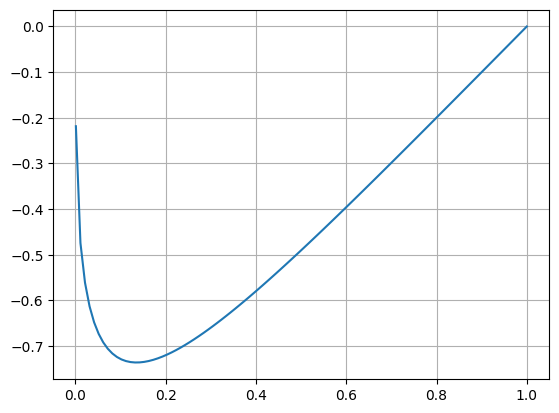

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def plot_func():
    x_points = np.linspace(1e-3, 1, 100)
    y_points = np.sqrt(x_points) * np.log(x_points)
    plt.plot(x_points, y_points)
    plt.grid(True)
    plt.show()
    
plot_func()

Объявляем общие переменные для всех методов

In [9]:
nodes = [2, 4, 8, 16, 32, 64, 128]
error = -4 / 9
result = []

Создадим функцию по вычислению погрешности

In [10]:
def calc_pogr(h, u, x_values, error, f):
    y_values = f(x_values, h)
    sum_res = h * sum(y_values)
    pogr = abs(sum_res - error)
    return pogr

Создадим функцию для вывода погрешности в виде таблицы

In [11]:
def print_pogr(nodes, pogr_list):
    print(f"кол-во узлов  | полученная погрешность")
    print(f"--------------------------------------")
    for u, pogr in zip(nodes, pogr_list):
        print(f"  {str(u).ljust(11, ' ')} | {pogr}")
    print("\n Средняя погрешность ", sum(pogr_list) / 7)

Создадим функцию для подсчета результатов

In [12]:
def calc_result(method_name, pogr_list):
    return (method_name, sum(pogr_list) / 7)

## Метод прямоугольников

Теперь мы попытаемся найти интеграл, используя разные методы. Первый метод - метод прямоугольников. Мы делим область под графиком на много маленьких прямоугольников, считаем их площади и складываем их. Это и будет нашим приближенным ответом.

## Метод правых прямоугольников

Сначала пробуем метод правых прямоугольников. Здесь мы считаем площадь прямоугольников, используя высоту на правом краю каждого прямоугольника.

In [13]:
pogr_list = [calc_pogr(1 / u, u, np.linspace(0, 1 - 1 / u, u), error, lambda x, h: np.sqrt(x + h) * np.log(x + h)) for u
             in nodes]
print_pogr(nodes, pogr_list)
result.append(calc_result("Правило правых прямоугольников", pogr_list))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.1993799085773076
  4           | 0.08634038563174029
  8           | 0.03635440492493103
  16          | 0.014969859599072877
  32          | 0.006054958374678787
  64          | 0.0024137607835620356
  128         | 0.0009507895141901979

 Средняя погрешность  0.04949486677221183


Мы смотрим, как меняется наш ответ в зависимости от количества прямоугольников. Чем больше прямоугольников, тем точнее должен быть наш ответ.

## Метод средних прямоугольников
В этом методе мы считаем высоту прямоугольника как значение функции в середине каждого прямоугольника.

In [14]:
pogr_list = [
    calc_pogr(1 / u, u, np.linspace(0, 1 - 1 / u, u), error, lambda x, h: np.sqrt(x + h / 2) * np.log(x + h / 2)) for u
    in nodes]
print_pogr(nodes, pogr_list)
result.append(calc_result("Правило средних прямоугольников", pogr_list))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.02669913731382706
  4           | 0.013631575781878014
  8           | 0.00641468572678533
  16          | 0.002859942849715136
  32          | 0.0012274368075549935
  64          | 0.0005121817551809738
  128         | 0.00020917394825931135

 Средняя погрешность  0.007364876311885831


## Метод левых прямоугольников

Далее пробуем метод левых прямоугольников. Здесь высота прямоугольника берется от значения функции на левом краю каждого прямоугольника.

In [15]:
pogr_list = [calc_pogr(1 / u, u, np.linspace(1e-10, 1 - 1 / u, u), error, lambda x, h: np.sqrt(x) * np.log(x)) for u in
             nodes]
print_pogr(nodes, pogr_list)
result.append(calc_result("Правило левых прямоугольников", pogr_list))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.1992647793226579
  4           | 0.08628282102234458
  8           | 0.036325622631660115
  16          | 0.014955468457709564
  32          | 0.006047762803828516
  64          | 0.0024101629933553914
  128         | 0.0009489906105040191

 Средняя погрешность  0.04946222969172287


## Метод трапеций

Теперь пробуем метод трапеций. Здесь мы считаем площадь под графиком как сумму площадей трапеций, а не прямоугольников. Средняя линия трапеции находится посередине между значениями функции на левом и правом краях.

In [16]:
pogr_list = [calc_pogr(1 / u, u, np.linspace(1e-10, 1, u + 1), error,
                       lambda x, h: (np.sqrt(x[:-1]) * np.log(x[:-1]) + np.sqrt(x[1:]) * np.log(x[1:])) / 2) for u in
             nodes]
print_pogr(nodes, pogr_list)
result.append(calc_result("Правило трапеций", pogr_list))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.1993223439730849
  4           | 0.08631160334731469
  8           | 0.03634001379408547
  16          | 0.014962664038909113
  32          | 0.0060513605944257365
  64          | 0.002411961888653835
  128         | 0.0009498900581531022

 Средняя погрешность  0.04947854824208955


Тут мы снова смотрим, как меняется погрешность при изменении количества трапеций.

## Метод Симпсона

Наконец, мы используем метод Симпсона, который на каждом отрезке аппроксимирует функцию параболой, а не прямой линией.

In [17]:
pogr_list = [abs(integrate.simps(np.sqrt(x) * np.log(x), dx=1 / u) - error) for u in nodes for x in
             [np.linspace(1e-10, 1, u + 1)]]
print_pogr(nodes, pogr_list)
result.append(calc_result("Правило Симпсона", pogr_list))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.11765335356751494
  4           | 0.04864135647205797
  8           | 0.019682817276342357
  16          | 0.007836880787183753
  32          | 0.0030809261129312038
  64          | 0.0011988289867296276
  128         | 0.0004625327813196356

 Средняя погрешность  0.028365242283439927


Тут мы тоже смотрим, как меняется погрешность при изменении количества отрезков.

## Вывод

В конце мы сравниваем погрешности всех методов и смотрим, какой из них оказался лучше всего для нашей задачи.

In [18]:
print("| Метод | Полученная средняя погрешность|")
print("|--------------------------------------|-------------------------------|")
for res in sorted(result, key=lambda x: x[1]):
    print(f"| {res[0].ljust(35, ' ')} | {str(res[1]).ljust(30, ' ')}|")

| Метод | Полученная средняя погрешность|
|--------------------------------------|-------------------------------|
| Правило средних прямоугольников     | 0.007364876311885831          |
| Правило Симпсона                    | 0.028365242283439927          |
| Правило левых прямоугольников       | 0.04946222969172287           |
| Правило трапеций                    | 0.04947854824208955           |
| Правило правых прямоугольников      | 0.04949486677221183           |
